In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import seaborn as sns
import numpy as np

In [2]:
# 2019
# Global variables
read_version_number = "17"
results_dir = "results/"
plot_data_dir = 'data_for_plotting/'
sample_dir = 'annotation/'
plot_version = "3"

df_tweets_senti_19 = pickle.load(open(results_dir + 'set_results_V' + read_version_number + "_19", 'rb'))
df_tweets_senti_20 = pickle.load(open(results_dir + 'set_results_V' + read_version_number + "_20", 'rb'))
df_tweets_senti_21 = pickle.load(open(results_dir + 'set_results_V' + read_version_number + "_21", 'rb'))

frames = [df_tweets_senti_19, df_tweets_senti_20, df_tweets_senti_21]
df_tweets_senti = pd.concat(frames)

# converting the string to datetime format
df_tweets_senti['date'] = pd.to_datetime(df_tweets_senti['date'], format='%Y-%m-%d %H:%M:%S')


# REMOVE TWEETS UP UNTIL MAY, BECAUSE THERE ARE LESS THAN 1000 TWEETS PER MONTH IN THOSE MONTHS
# # This removes 1636 tweets
start_date = "2019-06-01 00:00:01"

after_start_date = df_tweets_senti["date"] >= start_date
df_all = df_tweets_senti.loc[after_start_date]

print(df_all.shape)
# SAVE THE data with removed first months
with open(results_dir + 'set_results_V' + read_version_number + "_full", 'wb') as f:
    pickle.dump(df_all, f)


(292245, 17)


In [7]:
tot = 0
for i, g in df_all.groupby(pd.Grouper(key="date", freq="M")):
    tot += len(g['date'])
    print(len(g['date']))
    
print('done')
print(tot)

print(df_all.columns)
df_all

2034
1331
1526
15224
85449
31824
29036
8079
15422
6005
4415
2669
4604
23810
6398
4202
5719
11594
6213
2555
2129
3975
2055
3141
4933
7903
done
292245
Index(['date', 'tweet_author', 'tweet_conversation_id', 'tweet_created_at',
       'tweet', 'tweet_text_original', 'hashtags', 'like_count', 'quote_count',
       'reply_count', 'retweet_count', 'urls', 'pattern_senti',
       'pattern_subjectivity', 'pos_senti', 'neg_senti', 'tokenized_tweets'],
      dtype='object')


,date,tweet_author,tweet_conversation_id,tweet_created_at,tweet,tweet_text_original,hashtags,like_count,quote_count,reply_count,retweet_count,urls,pattern_senti,pattern_subjectivity,pos_senti,neg_senti,tokenized_tweets
1594,2019-06-02 13:16:08,2639875363,1134792112950697984,2019-06-02T13:16:08.000Z,poort dupont dow chemour dordrecht thenetherla...,Voor de poort van #DuPont #Dow #Chemours in #D...,"[{'end': 25, 'start': 18, 'tag': 'DuPont'}, {'...",5,0,1,0,[{'display_url': 'theintercept.com/2019/04/30/...,0.000000,0.000000,1,-2,"[poort, dupont, dow, chemour, dordrecht, thene..."
1595,2019-06-02 12:56:36,1057489082,1135168337057652736,2019-06-02T12:56:36.000Z,juist belang economie steeds leiden opzicht mi...,Juist! Belangen van economie nog steeds te vee...,[],7,0,0,5,[{'display_url': 'twitter.com/fpjvanerp/stat…'...,0.000000,0.800000,2,-3,"[juist, belang, economie, steeds, leiden, opzi..."
1596,2019-06-02 11:57:53,1963358725,1134920426818342918,2019-06-02T11:57:53.000Z,ijburglinda amsterdamnl mvdoorninck groendegro...,@IJburgLinda @AmsterdamNL @mvdoorninck @Groend...,[],0,0,1,0,[],-0.700000,0.900000,1,-3,"[ijburglinda, amsterdamnl, mvdoorninck, groend..."
1597,2019-06-02 11:01:42,84253549,1135139421571944448,2019-06-02T11:01:42.000Z,duidelijk toelichting inwikkelen uitspraak pro...,Duidelijke toelichting op ingewikkelde uitspra...,[],4,0,1,1,[{'display_url': 'twitter.com/RaadvanState/s…'...,0.123333,0.593333,1,-1,"[duidelijk, toelichting, inwikkelen, uitspraak..."
1598,2019-06-02 10:54:22,895930727396765696,1134843317739503616,2019-06-02T10:54:22.000Z,johan_emmens jvassema tja zitten idd denken ka...,"@johan_emmens @JvAssema Tja, ik zit idd ook te...","[{'end': 234, 'start': 230, 'tag': 'pas'}, {'e...",3,0,1,1,[],0.062500,0.200000,2,-1,"[johan_emmens, jvassema, tja, zitten, idd, den..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26686,2021-07-27 10:41:25,717863392,1419971179889270808,2021-07-27T10:41:25.000Z,luchtvaart boeren inkijk lelijk politiek https...,Luchtvaart of boeren? Een inkijkje in lelijke ...,"[{'end': 88, 'start': 81, 'tag': 'boeren'}, {'...",2,0,0,6,[{'description': 'CIP.nl is de website van het...,0.000000,0.400000,1,-1,"[luchtvaart, boeren, inkijk, lelijk, politiek,..."
26687,2021-07-27 10:30:09,1007998509407236096,1419968343411462149,2021-07-27T10:30:09.000Z,pensioen krijgen stikstofcrisi httpstcohjltvewab,Pensioen krijgt stikstofcrisis https://t.co/Hj...,[],0,0,0,0,"[{'display_url': 'pic.twitter.com/HjltVewAb7',...",0.000000,0.000000,1,-1,"[pensioen, krijgen, stikstofcrisi, httpstcohjl..."
26688,2021-07-27 10:25:42,1239489167912062977,1419967225608511494,2021-07-27T10:25:42.000Z,groen boeren mogen uitstoot campagne gascentra...,@groen Boeren mogen geen stikstof uitstoten (u...,[],0,0,0,0,[],-0.350000,0.600000,1,-3,"[groen, boeren, mogen, uitstoot, campagne, gas..."
26689,2021-07-27 09:58:43,1335160601308499968,1419960431666503686,2021-07-27T09:58:43.000Z,luchtvaart boeren inkijk lelijk politiek https...,Luchtvaart of boeren? Een inkijkje in lelijke ...,[],0,0,0,0,"[{'display_url': 'CIP.nl', 'end': 80, 'expande...",-0.100000,0.525000,1,-1,"[luchtvaart, boeren, inkijk, lelijk, politiek,..."


In [8]:
# # See how many tweets contain nazi words
# pd.set_option('display.max_colwidth', -1)
# df_all[df_all['tweet_text_original'].str.contains("nazi")]["tweet_text_original"]

(593.0, 617.0)

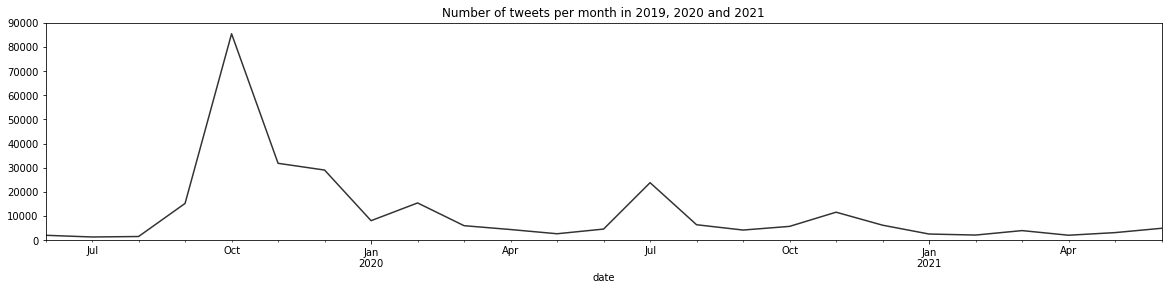

In [9]:
df_all_month = df_all.groupby(pd.Grouper(key="date", freq="M")).count()['tweet_author']


ax = df_all_month.plot(x="Date", y="Number of tweets", color="black", alpha=0.8, figsize=(20,4), title="Number of tweets per month in 2019, 2020 and 2021")
ax.set_ylim(0,90000)
ax.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')


(2579.0, 2688.0)

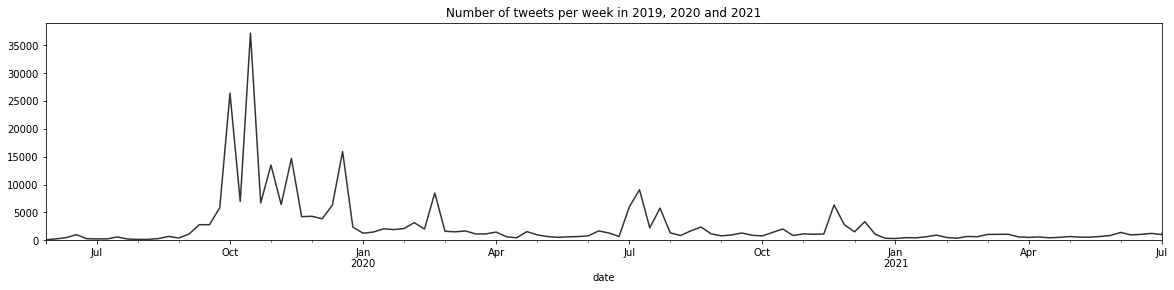

In [10]:
all_month = df_all.groupby(pd.Grouper(key="date", freq="W")).count()['tweet_author']
ax = all_month.plot(x="Date", y="Number of tweets", color="black", alpha=0.8, figsize=(20,4), title="Number of tweets per week in 2019, 2020 and 2021")
ax.set_ylim(0)
ax.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

In [11]:
df_all_month = all_month.to_frame()

df_all_month = df_all_month.rename(columns={"tweet_author": "number of tweets per week"})

# SAVE THE TWEET VOLUME DATA
with open("{}tweet_volume_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(df_all_month, f)

# Little variation in average sentiment
The above average pattern sentiment scores do not vary much (scores are between 0.04 and 0.06). However, pattern.nl scores many tweets with 0, unable to give the tweet a sentiment score, so let's try what happens with the average sentiment if we remove the tweets which score 0 in sentiment:

In [12]:
df_all_nonull = df_all[df_all.pattern_senti != 0]
df_all_nonull
print(df_all_nonull.shape)

(198280, 17)


We are left with 18601 tweets
Let's plot the average sentiment in these tweets

(0.0, 0.1)

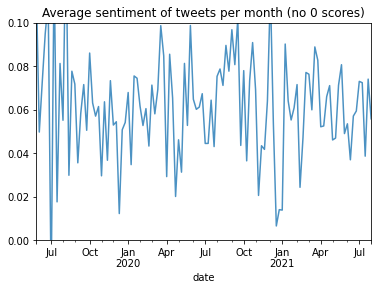

In [13]:
ax2 = df_all_nonull.groupby(pd.Grouper(key="date", freq="W")).mean()['pattern_senti'].plot(x="Date", y="Number of tweets", alpha=0.8, title="Average sentiment of tweets per month (no 0 scores)")
ax2.set_ylim(0,0.1)

# Sentiment analysis
### Pattern

(593.0, 617.0)

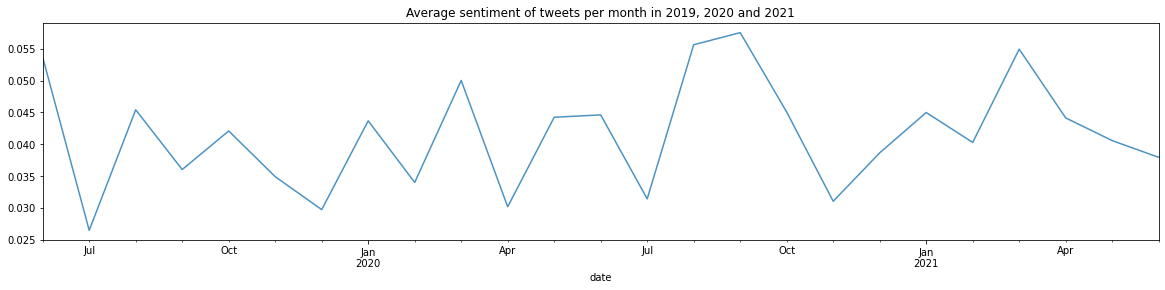

In [14]:
ax3 = df_all.groupby(pd.Grouper(key="date", freq="M")).mean()['pattern_senti'].plot(x="Date", y="Number of tweets", alpha=0.8, figsize=(20,4), title="Average sentiment of tweets per month in 2019, 2020 and 2021")
# ax.set_ylim(0)
ax3.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

(2579.0, 2688.0)

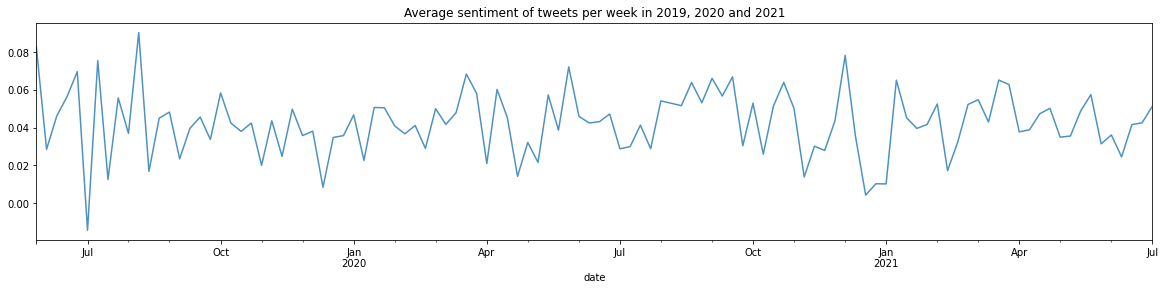

In [15]:
ax4 = df_all.groupby(pd.Grouper(key="date", freq="W")).mean()['pattern_senti'].plot(x="Date", y="Number of tweets", alpha=0.8, figsize=(20,4), title="Average sentiment of tweets per week in 2019, 2020 and 2021")
# ax.set_ylim(0,0.1)
ax4.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

In [16]:
# Let's divide positive and negative tweets

df_all_patt_pos = df_all[df_all['pattern_senti'] > 0]
df_all_patt_neg = df_all[df_all['pattern_senti'] < 0]

print("Highest positive sentiment: {}".format(df_all_patt_pos["pattern_senti"].max()))
print("Lowest negative sentiment: {}".format(df_all_patt_neg["pattern_senti"].min()))

print("len df_all_patt_pos: {}".format(len(df_all_patt_pos)))
print("len df_all_patt_neg: {}".format(len(df_all_patt_neg)))

Highest positive sentiment: 1.0
Lowest negative sentiment: -1.0
len df_all_patt_pos: 118139
len df_all_patt_neg: 80141


C:\Users\mila1\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


(2579.0, 2688.0)

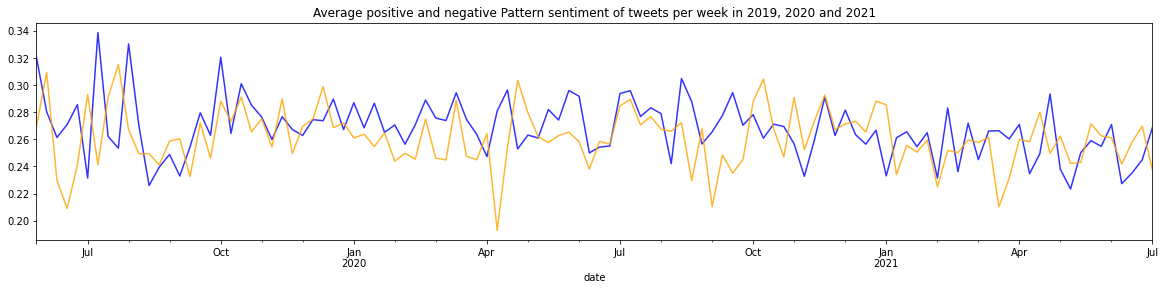

In [17]:
all_patt_pos = df_all_patt_pos.groupby(pd.Grouper(key="date", freq="W")).mean()['pattern_senti']
ax4 = all_patt_pos.plot(x="Date", y="Number of tweets", alpha=0.8, color="blue", figsize=(20,4))
df_all_patt_neg_abs = df_all_patt_neg

df_all_patt_neg_abs['pattern_senti_abs'] = df_all_patt_neg_abs['pattern_senti'] * -1
all_patt_neg = df_all_patt_neg_abs.groupby(pd.Grouper(key="date", freq="W")).mean()['pattern_senti_abs']
ax5 = all_patt_neg.plot(x="Date", y="Number of tweets", alpha=0.8, color="orange", figsize=(20,4), title="Average positive and negative Pattern sentiment of tweets per week in 2019, 2020 and 2021")
ax5.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')


## Store average sentiment data Pattern

In [18]:
write_all_patt_pos = all_patt_pos.to_frame()
write_all_patt_neg = all_patt_neg.to_frame()


# SAVE THE PATTERN POSITIVE AND NEGATIVE DATA 
with open("{}df_week_patt_pos_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_patt_pos, f)

with open("{}df_week_patt_neg_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_patt_neg, f)
    

(2579.0, 2688.0)

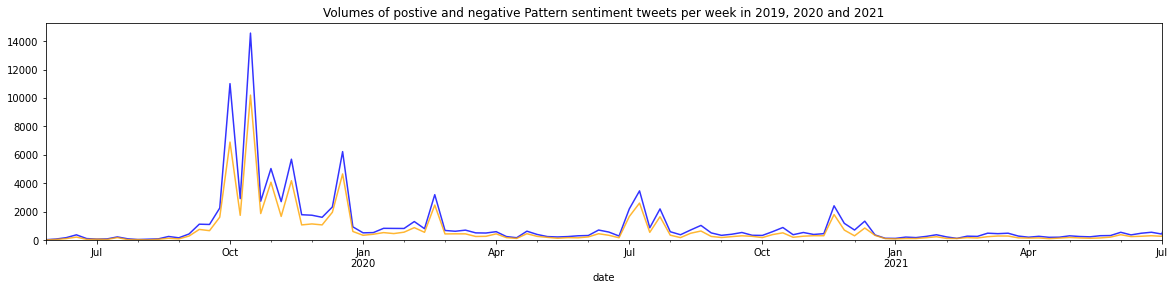

In [19]:
# volume of positive tweets over time
df_all_patt_pos_vol = df_all_patt_pos.groupby(pd.Grouper(key="date", freq="W")).count()['pattern_senti']
ax6 = df_all_patt_pos_vol.plot(x="Date", y="Number of tweets", alpha=0.8, color="blue", figsize=(20,4))

df_all_patt_neg_vol = df_all_patt_neg.groupby(pd.Grouper(key="date", freq="W")).count()['pattern_senti']
ax7 = df_all_patt_neg_vol.plot(x="Date", y="Number of tweets", alpha=0.8, color="orange", figsize=(20,4), title="Volumes of postive and negative Pattern sentiment tweets per week in 2019, 2020 and 2021")
ax7.set_ylim(0)
ax6.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

## Store volume of sentiment data Pattern

In [20]:
write_all_patt_pos_vol = df_all_patt_pos_vol.to_frame()
write_all_patt_neg_vol = df_all_patt_neg_vol.to_frame()


# SAVE THE PATTERN POSITIVE AND NEGATIVE DATA 
with open("{}df_week_patt_pos_vol_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_patt_pos_vol, f)

with open("{}df_week_patt_neg_vol_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_patt_neg_vol, f)
    

In [21]:
plt_df_all_patt_pos = df_all_patt_pos[['date', 'pattern_senti']]
plt_df_all_patt_pos
plt_df_all_patt_pos = plt_df_all_patt_pos.groupby(pd.Grouper(key="date", freq="W"))['pattern_senti'].agg([np.mean, np.std])
plt_df_all_patt_pos
plt_df_all_patt_pos['date'] = plt_df_all_patt_pos.index

plt_df_all_patt_neg = df_all_patt_neg_abs[['date', 'pattern_senti_abs']]
plt_df_all_patt_neg = df_all_patt_neg.groupby(pd.Grouper(key="date", freq="W"))['pattern_senti_abs'].agg([np.mean, np.std])
plt_df_all_patt_neg['date'] = plt_df_all_patt_neg.index

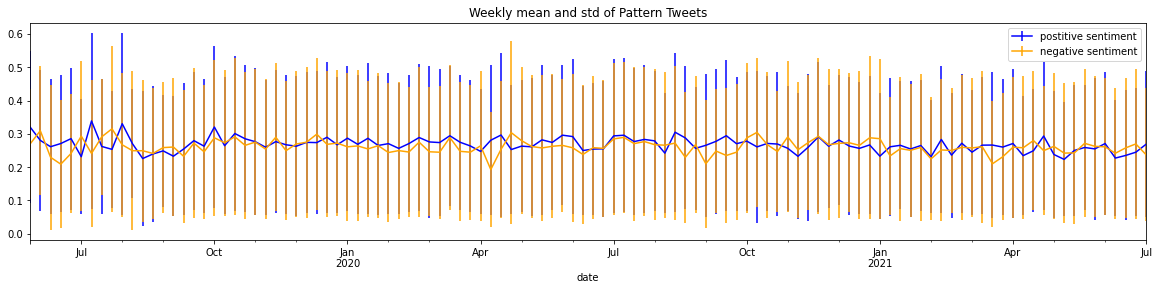

In [22]:
fig, ax12 = plt.subplots()    # 1
plt_df_all_patt_pos.plot('date', 'mean', yerr='std', ax=ax12, figsize=(20,4), color="blue", title="Weekly mean and std of Pattern Tweets", label="postitive sentiment")   # 2
ax12.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

plt_df_all_patt_neg.plot('date', 'mean', yerr='std', ax=ax12, figsize=(20,4), color="orange", label="negative sentiment")   # 2
ax12.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')
plt.show()

## SentiStrength

In [23]:
print("Total tweets over the 3 years: {}".format(len(df_all)))

print("Scale of positive sentiment: {}".format(df_all["pos_senti"].unique()))

print("Scale of negative sentiment: {}".format(df_all["neg_senti"].unique()))

df_all_SS_pos = df_all.loc[((df_all['pos_senti'] > 1) & (df_all['pos_senti'] > -1*df_all['neg_senti']))]
# df_all_SS_neg = df_all[df_all['neg_senti'] < -1]
df_all_SS_neg = df_all.loc[((df_all['neg_senti'] < -1) & (df_all['neg_senti'] < -1*df_all['pos_senti']))]

df_all_not_assigned = df_all.loc[((df_all['neg_senti'] < -1) & (df_all['neg_senti'] == -1*df_all['pos_senti']))]

print("len df_all_SS_pos: {}".format(len(df_all_SS_pos)))

print("len df_all_SS_neg: {}".format(len(df_all_SS_neg)))

# df_all_pos = df_all.groupby(pd.Grouper(key="date", freq="M")).count()['tweet_author']

pd.merge(df_all_SS_pos, df_all_SS_neg, how ='inner', on =['tweet_text_original'])

Total tweets over the 3 years: 292245
Scale of positive sentiment: [1 2 3 4 5]
Scale of negative sentiment: [-2 -3 -1 -4 -5]
len df_all_SS_pos: 39398
len df_all_SS_neg: 135992


,date_x,tweet_author_x,tweet_conversation_id_x,tweet_created_at_x,tweet_x,tweet_text_original,hashtags_x,like_count_x,quote_count_x,reply_count_x,...,like_count_y,quote_count_y,reply_count_y,retweet_count_y,urls_y,pattern_senti_y,pattern_subjectivity_y,pos_senti_y,neg_senti_y,tokenized_tweets_y


### Plotting

C:\Users\mila1\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


(2579.0, 2688.0)

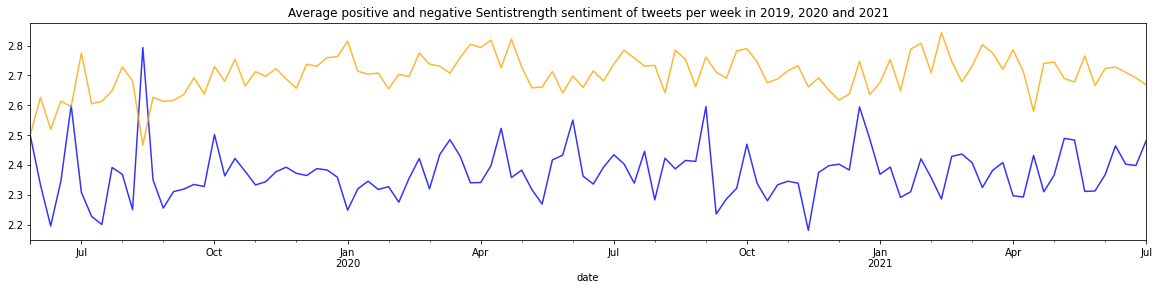

In [24]:
all_SS_pos = df_all_SS_pos.groupby(pd.Grouper(key="date", freq="W")).mean()['pos_senti']
ax8 = all_SS_pos.plot(x="Date", y="Number of tweets", alpha=0.8, color="blue", figsize=(20,4))

df_all_SS_neg['neg_senti_abs'] = df_all_SS_neg['neg_senti'] * -1
all_SS_neg = df_all_SS_neg.groupby(pd.Grouper(key="date", freq="W")).mean()['neg_senti_abs']
ax9 = all_SS_neg.plot(x="Date", y="Number of tweets", alpha=0.8, color="orange", figsize=(20,4), title="Average positive and negative Sentistrength sentiment of tweets per week in 2019, 2020 and 2021")
ax8.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

### Store average sentiment data SentiStrenght

In [25]:
write_all_SS_pos = all_SS_pos.to_frame()
write_all_SS_neg = all_SS_neg.to_frame()


# SAVE THE PATTERN POSITIVE AND NEGATIVE DATA 
with open("{}df_week_SS_pos_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_SS_pos, f)

with open("{}df_week_SS_neg_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_SS_neg, f)
    

C:\Users\mila1\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


(2579.0, 2688.0)

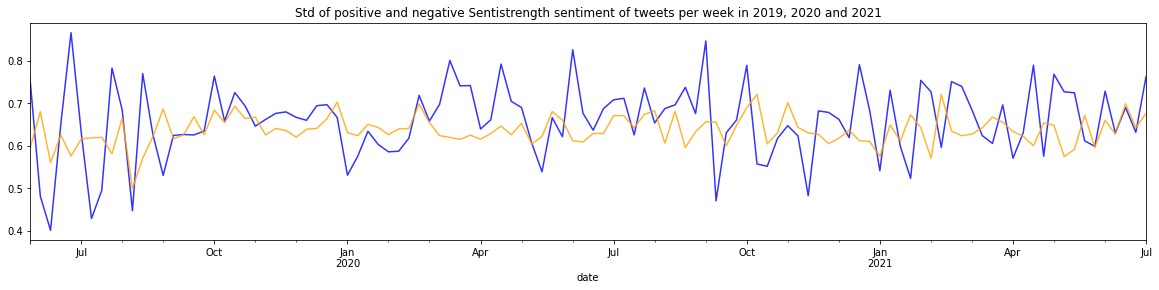

In [26]:
# Plot standard deviaton


ax10 = df_all_SS_pos.groupby(pd.Grouper(key="date", freq="W")).std()['pos_senti'].plot(x="Date", y="Number of tweets", alpha=0.8, color="blue", figsize=(20,4))

df_all_SS_neg['neg_senti_abs'] = df_all_SS_neg['neg_senti'] * -1
ax11 = df_all_SS_neg.groupby(pd.Grouper(key="date", freq="W")).std()['neg_senti_abs'].plot(x="Date", y="Number of tweets", alpha=0.8, color="orange", figsize=(20,4), title="Std of positive and negative Sentistrength sentiment of tweets per week in 2019, 2020 and 2021")
ax10.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

In [27]:
plt_df_all_SS_pos = df_all_SS_pos[['date', 'pos_senti']]
plt_df_all_SS_pos = plt_df_all_SS_pos.groupby(pd.Grouper(key="date", freq="W"))['pos_senti'].agg([np.mean, np.std])
plt_df_all_SS_pos['date'] = plt_df_all_SS_pos.index

plt_df_all_SS_neg = df_all_SS_neg[['date', 'neg_senti_abs']]
plt_df_all_SS_neg = df_all_SS_neg.groupby(pd.Grouper(key="date", freq="W"))['neg_senti_abs'].agg([np.mean, np.std])
plt_df_all_SS_neg['date'] = plt_df_all_SS_neg.index



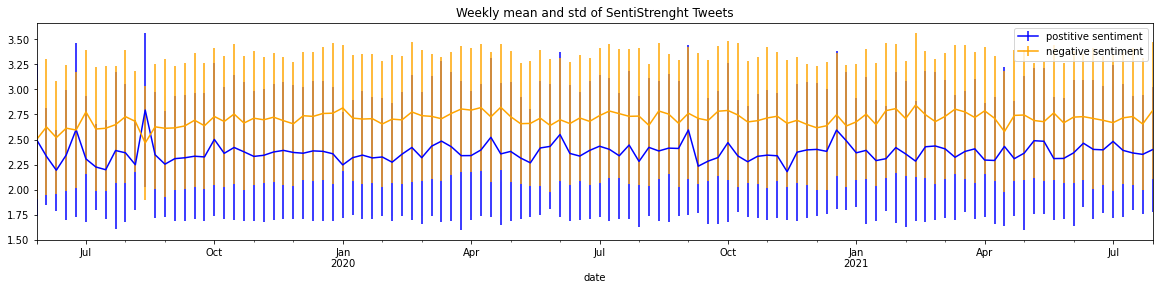

In [28]:
fig, ax12 = plt.subplots()    # 1
plt_df_all_SS_pos.plot('date', 'mean', yerr='std', ax=ax12, figsize=(20,4), color="blue", title="Weekly mean and std of SentiStrenght Tweets", label="postitive sentiment")   # 2
ax12.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')

# fig, ax13 = plt.subplots()    # 1
plt_df_all_SS_neg.plot('date', 'mean', yerr='std', ax=ax12, figsize=(20,4), color="orange", label="negative sentiment")   # 2
# ax13.set_xlim('2019-06-01 00:00:00','2021-06-30 23:59:59')
plt.show()

(0.0, 11500.0)

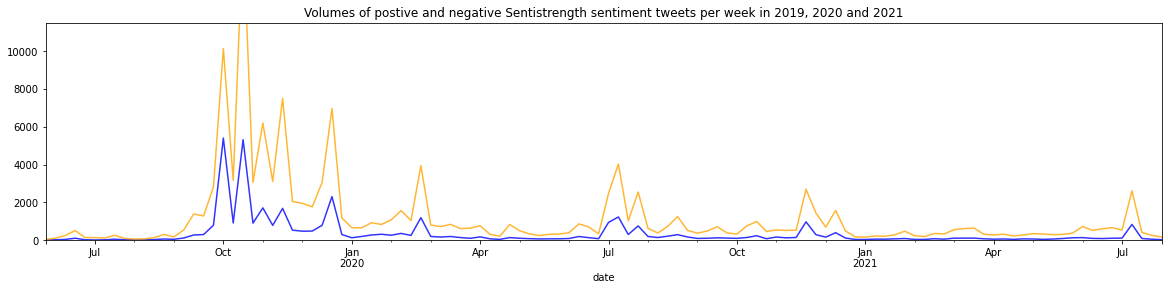

In [29]:
# volume of positive and negative tweets over time
df_all_SS_pos_vol = df_all_SS_pos.groupby(pd.Grouper(key="date", freq="W")).count()['pos_senti']
df_all_SS_neg_vol = df_all_SS_neg.groupby(pd.Grouper(key="date", freq="W")).count()['neg_senti']
ax4 = df_all_SS_pos_vol.plot(x="Date", y="Number of tweets", alpha=0.8, color="blue", figsize=(20,4))
ax4 = df_all_SS_neg_vol.plot(x="Date", y="Number of tweets", alpha=0.8, color="orange", figsize=(20,4), title="Volumes of postive and negative Sentistrength sentiment tweets per week in 2019, 2020 and 2021")
ax4.set_ylim(0,11500)

## Store volume of SentiStrength 

In [30]:
write_all_SS_pos_vol = df_all_SS_pos_vol.to_frame()
write_all_SS_neg_vol = df_all_SS_neg_vol.to_frame()


# SAVE THE SENTISTRENGHT POSITIVE AND NEGATIVE DATA 
with open("{}df_week_SS_pos_vol_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_SS_pos_vol, f)

with open("{}df_week_SS_neg_vol_V{}".format(plot_data_dir, plot_version), 'wb') as f:
    pickle.dump(write_all_SS_neg_vol, f)


# Calc Pearson correlation coefficient of sentiment analyses

In [35]:
conv_all_patt_pos = all_patt_pos*5
conv_all_patt_neg = all_patt_neg*5
all_SS_pos
all_SS_neg
df_all
df_all_patt_pos
df_all_patt_neg


# positive_sentiment = pd.DataFrame({'Pattern average positive sentiment' : conv_all_patt_pos, 'SS average positive sentiment' : all_SS_pos})
# pos_corr = positive_sentiment.corr(method='pearson',min_periods=1)
pos_corr = df_all_patt_pos[['pattern_senti', 'pos_senti']].corr(method='spearman',min_periods=1)
pos_corr

# negative_sentiment = pd.DataFrame({'Pattern average negative sentiment' : conv_all_patt_neg, 'SS average negative sentiment' : all_SS_neg})
# neg_corr = negative_sentiment.corr(method='pearson',min_periods=1)
neg_corr = df_all_patt_neg[['pattern_senti', 'neg_senti']].corr(method='spearman',min_periods=1)
neg_corr

print("Pearson correlation coefficient positive sentiment analysis methods: {}, negative: {}".format(pos_corr.iloc[0,1], neg_corr.iloc[0,1]))


df_all_patt_pos.to_csv('Pos_patt_correlation.csv', index=False)  
df_all_patt_neg.to_csv('Neg_patt_correlation.csv', index=False)  

Pearson correlation coefficient positive sentiment analysis methods: 0.1667497797879494, negative: -0.08231015254997434


In [1]:
df_all_patt_neg[['pattern_senti', 'neg_senti']]

NameError: name 'df_all_patt_neg' is not defined

# Write away 100 tweets for annotation



In [28]:
annotation_version = "3"


In [29]:
frames = [df_all_patt_pos.sample(n = 20), df_all_patt_neg.sample(n = 20), df_all_SS_pos.sample(n = 20), df_all_SS_neg.sample(n = 20), df_all.sample(n = 20)]

In [30]:
df_annotation_sample = pd.concat(frames)
df_annotation_sample = df_annotation_sample.sample(frac=1)
df_annotation_sample

,date,tweet_author,tweet_conversation_id,tweet_created_at,tweet,tweet_text_original,hashtags,like_count,quote_count,reply_count,retweet_count,urls,pattern_senti,pattern_subjectivity,pos_senti,neg_senti,tokenized_tweets,pattern_senti_abs,neg_senti_abs
43296,2020-07-02 23:23:53,1216327940285313024,1278831794276765703,2020-07-02T23:23:53.000Z,menukaart verder openslaan eerder frans timmer...,De menukaart van de #EU is verder opengeslagen...,"[{'end': 23, 'start': 20, 'tag': 'EU'}, {'end'...",1,0,0,0,[],0.087500,0.475000,1,-1,"[menukaart, verder, openslaan, eerder, frans, ...",NaN,NaN
39328,2020-06-18 01:22:11,506514571,1273379852595466240,2020-06-18T01:22:11.000Z,dreigen landelijk tekort nieuws zelfs vast mes...,En dan dreigt er ook nog eens landelijk een te...,"[{'end': 64, 'start': 55, 'tag': 'stikstof'}, ...",18,0,3,15,[{'display_url': 'twitter.com/nieuweoogstnl/…'...,-0.100000,0.455556,1,-2,"[dreigen, landelijk, tekort, nieuws, zelfs, va...",NaN,2.0
154520,2019-12-18 08:39:03,203880903,1207208564256919552,2019-12-18T08:39:03.000Z,boomeik gelehesjesnl blokkeerpolitie houden bo...,@boomeik @GeLeHesjesNL #Blokkeerpolitie houden...,"[{'end': 39, 'start': 23, 'tag': 'Blokkeerpoli...",2,0,0,0,[],0.000000,0.000000,1,-2,"[boomeik, gelehesjesnl, blokkeerpolitie, houde...",NaN,2.0
96561,2020-12-11 11:51:13,925428617525514240,1337350227053989889,2020-12-11T11:51:13.000Z,frank_luttel put kalkzandsteen opvreten zwavel...,@Frank_Luttels Niet bij mij in de put. Kalkzan...,[],3,0,1,0,[],0.116667,0.322222,1,-2,"[frank_luttel, put, kalkzandsteen, opvreten, z...",NaN,NaN
30108,2019-10-01 09:59:50,830094705744547840,1178972782601871361,2019-10-01T09:59:50.000Z,boerenprotest hiermee httpstconuzdkgvui,#boerenprotest Hiermee ben ik het eens. https:...,"[{'end': 14, 'start': 0, 'tag': 'boerenprotest'}]",1,0,0,0,[{'display_url': 'twitter.com/GKleinpaste/st…'...,0.100000,0.400000,1,-1,"[boerenprotest, hiermee, httpstconuzdkgvui]",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164425,2019-12-20 19:20:52,108706650,1208105000347537410,2019-12-20T19:20:52.000Z,fdf weer actie organiseren ergens tussen kerst...,#FDF wil weer acties organiseren. Ergens tusse...,"[{'end': 4, 'start': 0, 'tag': 'FDF'}, {'end':...",2,0,0,1,[{'display_url': 'boerderij.nl/Home/Nieuws/20…...,-0.300000,0.675000,1,-1,"[fdf, weer, actie, organiseren, ergens, tussen...",0.300,NaN
151107,2019-12-17 17:13:12,1347799502,1206985710600888320,2019-12-17T17:13:12.000Z,voelen flevoboer flink naaien lelystadairport ...,Dan voel je je als Flevoboer toch flink genaai...,"[{'end': 70, 'start': 54, 'tag': 'lelystadairp...",3,0,0,6,[{'display_url': 'vechtdalfm.nl/stikstofuitsto...,0.500000,0.850000,1,-1,"[voelen, flevoboer, flink, naaien, lelystadair...",NaN,NaN
40794,2020-06-26 19:28:45,20843212,1276592114202226689,2020-06-26T19:28:45.000Z,bm_visser zeggen veestapel stapsgewij terug br...,@BM_Visser Er is dus veel voor te zeggen de ve...,[],2,0,0,0,[],0.000000,0.000000,1,-2,"[bm_visser, zeggen, veestapel, stapsgewij, ter...",NaN,2.0
97,2021-01-03 17:05:11,217365198,1345778246185574402,2021-01-03T17:05:11.000Z,vinden erg stikstofcrisi natuur dood degene we...,"Vond u het ook zo erg, in 2020?\nDat met die s...",[],142,7,42,30,"[{'display_url': 'pic.twitter.com/Zd74AxDTBC',...",-0.275000,0.700000,1,-3,"[vinden, erg, stikstofcrisi, natuur, dood, deg...",0.275,NaN


In [31]:
with open(sample_dir + 'annotation_raw_V' + annotation_version, 'wb') as f:
    pickle.dump(df_annotation_sample, f)
    
df_annotation_sample.to_csv(sample_dir + 'annotation_raw_V'+ annotation_version + '.csv', index=False)  